Kd = 0.14374002063642147 +/- 0.9994208728308619
popt [1.43740021e-01 1.28552820e-31 9.65433160e+01 2.05435422e+02]


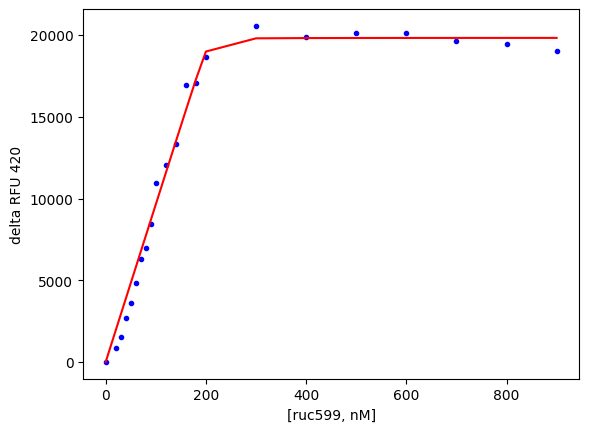

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
import pandas as pd

def func(Pt, Kd, c, Eps, Lt): 
    return (1/2*(Kd + Lt + Pt - np.sqrt((Kd + Lt + Pt)**2 - 4*Lt*Pt)))*Eps + c

#Pt = [0, 0.384, 0.768, 1.15, 1.53, 1.91, 2.29, 2.67, 3.05, 3.42, 3.80, 4.73, 5.67, 6.59, 7.51, 11.1]
#ydata = [0.053, 0.101, 0.112, 0.131, 0.152, 0.172, 0.193, 0.204, 0.224, 0.235, 0.244, 0.248, 0.254, 0.2548, 0.256, 0.262] 
Pt = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 300, 400, 500, 600, 700, 800, 900]
ydata = [0, 825.75, 1555.75, 2699.5, 3620.75, 4801.5, 6299.75, 6993.75,8427.5,10967.5,12033.25,13354,16970.25,
         17082.25,18684.75,20562.5,19912.25,20145.25,20126.75,19618.5,19464.75,19005.25]

plt.plot(Pt, ydata, 'b.', label='data')

#e = np.repeat(0.0001, 22)
#plt.errorbar(Pt, ydata, yerr=e, fmt="none")
#popt, pcov = curve_fit(func, Pt, ydata, p0=[0.1, 0.05, 0.055, 3.8], bounds=(0, [1, 0.1, 0.1, 5])) #sigma=e)     
#popt, pcov = curve_fit(func, Pt, ydata, p0=[5, 0.05, 1, 100], bounds=(0, [1, 0.1, 1000, 200])) #sigma=e)     
popt, pcov = curve_fit(func, Pt, ydata, p0=[5, 0.1, 9000, 100], bounds=(0, [500, 1, 15000, 500]))
print("Kd =", popt[0], "+/-", pcov[0,0]**0.001)

print('popt {}'.format(popt))
#perr = np.sqrt(np.diag(pcov))
#print('perr {}'.format(perr))


ymodel=[]
for val in Pt:
    ymodel.append(func(val, *popt))

plt.plot(Pt, ymodel, 'r-')
plt.xlabel('[ruc599, nM]')
plt.ylabel('delta RFU 420')
plt.show()

#output [0.12184595 0.06458745 0.06176167 3.21127899]

Kd = 1.0913978003512608 +/- 0.9999160381243893
popt [1.09139780e+00 1.15895283e-16 2.16754801e+02 1.84377961e+00]


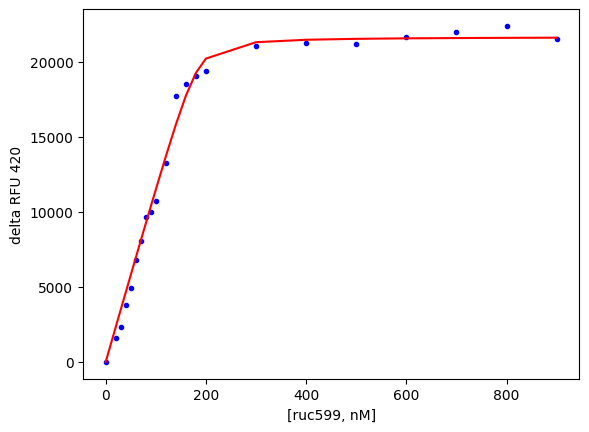

[1.158952833298744e-16, 2322.8069368214296, 3481.532726573339, 4638.002769211934, 5791.7421412403455, 6942.135995653735, 8088.375591841264, 9229.378297894053, 10363.666478772715, 11489.180141252204, 13700.777615078545, 15819.361217846976, 17742.431258088276, 19267.723797799135, 20221.624319687802, 21314.133076943424, 21476.609489021554, 21538.661590432926, 21571.26191387186, 21591.333347601176, 21604.9284308235, 21614.744306905046]


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def func(Pt, Kd, c, Eps, Lt): 
    return (1/2*(Kd + Lt + Pt - np.sqrt((Kd + Lt + Pt)**2 - 4*Lt*Pt)))*Eps + c

def func_n(Pt, Kd, c, Eps, n, Lt=100): 
    return (1/2*(Kd + Lt + Pt/n - np.sqrt((Kd + Lt + Pt/n)**2 - 4*Lt*Pt/n)))*Eps + c

#Pt = [0, 0.384, 0.768, 1.15, 1.53, 1.91, 2.29, 2.67, 3.05, 3.42, 3.80, 4.73, 5.67, 6.59, 7.51, 11.1]
#ydata = [0.053, 0.101, 0.112, 0.131, 0.152, 0.172, 0.193, 0.204, 0.224, 0.235, 0.244, 0.248, 0.254, 0.2548, 0.256, 0.262] 
Pt = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 300, 400, 500, 600, 700, 800, 900]
ydata = [0,1562.25,2342.5,3826.25,4919.25,6784.75,8048,9644,10007,10745,13256,17703,18558,19031,19395.5,
         21056.25,21257.75,21172,21663.75,21981.75,22399.75,21521.25]

plt.plot(Pt, ydata, 'b.', label='data')

#e = np.repeat(0.0001, 22)
#plt.errorbar(Pt, ydata, yerr=e, fmt="none")
#popt, pcov = curve_fit(func, Pt, ydata, p0=[0.1, 0.05, 0.055, 3.8], bounds=(0, [1, 0.1, 0.1, 5])) #sigma=e)     
#popt, pcov = curve_fit(func, Pt, ydata, p0=[5, 0.05, 1, 100], bounds=(0, [1, 0.1, 1000, 200])) #sigma=e)     
popt, pcov = curve_fit(func_n, Pt, ydata, p0=[5, 1, 9000, 1], bounds=(0, [1000, 100, 15000, 5]))
print("Kd =", popt[0], "+/-", pcov[0,0]**0.001)

print('popt {}'.format(popt))
#perr = np.sqrt(np.diag(pcov))
#print('perr {}'.format(perr))


ymodel=[]
for val in Pt:
    ymodel.append(func_n(val, *popt))

plt.plot(Pt, ymodel, 'r-')
plt.xlabel('[ruc599, nM]')
plt.ylabel('delta RFU 420')
plt.show()

print(ymodel)

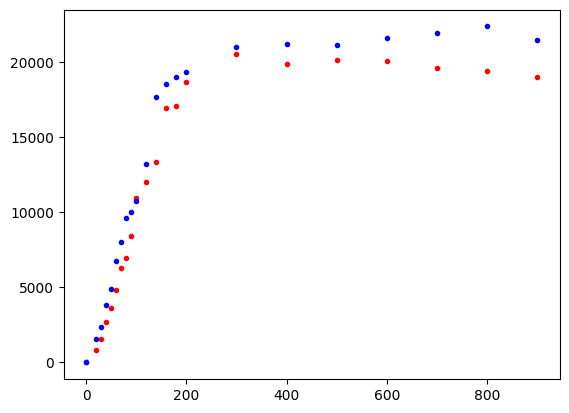

In [31]:
Pt = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 300, 400, 500, 600, 700, 800, 900]
ydata2 = [0,1562.25,2342.5,3826.25,4919.25,6784.75,8048,9644,10007,10745,13256,17703,18558,19031,19395.5,
         21056.25,21257.75,21172,21663.75,21981.75,22399.75,21521.25]

ydata1 = [0, 825.75, 1555.75, 2699.5, 3620.75, 4801.5, 6299.75, 6993.75,8427.5,10967.5,12033.25,13354,16970.25,
         17082.25,18684.75,20562.5,19912.25,20145.25,20126.75,19618.5,19464.75,19005.25]

plt.plot(Pt, ydata1, 'b.', label='data', color = 'red')

plt.plot(Pt, ydata2, 'b.', label='data')

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
import pandas as pd



workdir = '/mnt/f/My Drive/PARPi binder paper/Figures/Fig2_binding_kd/'

data_1 = pd.read_table(workdir + 'ruc_fluo_kd/ordered_data/599_2nd.txt', header=None) 
data_2 = pd.read_table(workdir + 'ruc_fluo_kd/ordered_data/599_3rd.txt', header=None) 
data_3 = pd.read_table(workdir + 'ruc_fluo_kd/ordered_data/599_4th.txt', header=None)




#print(data_1[0].values)
#print(type(data_1[0].values))
#Pt = np.array((data_1[0].values, data_2[0].values, data_3[0].values))
#print(Pt)
Pt = data_1[0].values
#ydata = np.array((data_1[5].values, data_2[5].values, data_3[5].values))
ydata = np.array((data_1[5].values, data_2[5].values))
#print(ydata)

def func_n(Pt, Kd, c, Eps, n, Lt=100): 
    return (1/2*(Kd + Lt + Pt/n - np.sqrt((Kd + Lt + Pt/n)**2 - 4*Lt*Pt/n)))*Eps + c



popt, pcov = curve_fit(lambda Pt, Kd, c, Eps, n: np.tile(func_n(Pt, Kd, c, Eps, n), len(ydata)), Pt, ydata.ravel(), p0=[5, 1, 9000, 1], bounds=(0, [1000, 100, 15000, 5]))

print("Kd =", popt[0], "+/-", pcov[0,0]**0.001)

print(popt)

print(pcov)
#popt, pcov = curve_fit(func_n, Pt, ydata, p0=[5, 1, 9000, 1], bounds=(0, [1000, 100, 15000, 5]))

Kd = 0.4957937356160364 +/- 0.9993452963513046
[4.95793736e-01 9.95004995e-23 2.07395899e+02 1.94717113e+00]
[[ 5.19484627e-01 -1.37273973e+02  2.46691562e+00 -4.38880813e-02]
 [-1.37273973e+02  2.09388996e+05 -2.31183543e+03  2.57645118e+01]
 [ 2.46691562e+00 -2.31183543e+03  3.68184877e+01 -2.43527662e-01]
 [-4.38880813e-02  2.57645118e+01 -2.43527662e-01  7.93185232e-03]]


x = [0 1 2 3 4]
y = [[-0.25927096  0.95785236  1.97723427  3.0960497   4.04091587]
 [-0.17949192  1.19739559  1.92201586  2.85764205  3.72938225]
 [-0.00515082  0.92633698  2.0794713   2.64191029  4.27618409]]
[ 1.01649363 -0.08242213]
[[ 0.00108368 -0.00216736]
 [-0.00216736  0.00650208]]


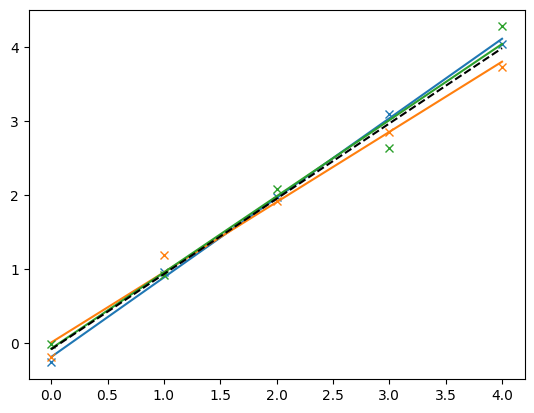

In [29]:
#Example from stackoverflow. https://stackoverflow.com/questions/59505194/global-fitting-using-scipy-curve-fit

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

m = 5
n = 3
x = np.arange(m)
y = np.array([x + np.random.normal(0, 0.2, len(x)) for _ in range(n)])
print("x =", x)
print("y =", y)

def f(x, a, b):
    return a * x + b

# single fits to each dataset
for y_i in y:
    popt, pcov = curve_fit(f, x, y_i)
    plt.plot(x, y_i, linestyle="", marker="x")
    plt.plot(x, f(x, *popt), color=plt.gca().lines[-1].get_color())

# global fit to concatenated dataset
popt, pcov = curve_fit(lambda x, a, b: np.tile(f(x, a, b), len(y)), x, y.ravel())
print(popt)
print(pcov)

plt.plot(x, f(x, *popt), linestyle="--", color="black")

plt.show()